# **Importing the libraries**

In [1]:
import numpy as np 
  
import pandas as pd 
  
import matplotlib.pyplot as plt 

# **Importing the datasets**

In [2]:
train_df = pd.read_csv("/home/somya/Downloads/mnist_train_small.csv")
test_df = pd.read_csv("/home/somya/Downloads/mnist_test.csv")

In [3]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Arranging the training dataset**

In [5]:
x1 = train_df.drop(['6'], axis = 1).values

x0_train = np.ones((np.shape(x1)[0],1))

x_train = np.hstack((x0_train,x1))

In [6]:
print(x_train)
print(x_train.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(19999, 785)


In [7]:
y1 = train_df['6']
y_train = y1.to_numpy()
y_train = np.vstack(y_train)

In [8]:
print(y_train)
print(y_train.shape)

[[5]
 [7]
 [9]
 ...
 [2]
 [9]
 [5]]
(19999, 1)


# **Arranging the test dataset**

In [9]:
x2 = test_df.drop(index = 1942 , columns ='7').values

x0_test = np.ones((np.shape(x2)[0],1))

x_test = np.hstack((x0_test,x2))

In [10]:
print(x_test)
print(x_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(1942, 785)


In [11]:
y2 = test_df['7']
y_test = y2.drop(index = 1942).values
y_test = np.vstack(y_test)

In [12]:
print(y_test)
print(y_test.shape)

[[2]
 [1]
 [0]
 ...
 [5]
 [7]
 [8]]
(1942, 1)


# **Visualising the data**

In [13]:
digit = x1[0]
digit_image = digit.reshape(28,28)

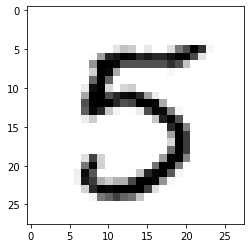

In [14]:
plt.imshow(digit_image, cmap = plt.cm.binary)

# **Implementation of model**

In [15]:
#Collecting unique elements from training labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
#Applying one hot encoding
y_enc = np.zeros([y_train.shape[0], np.unique(y_train).shape[0]])

for i in range(np.unique(y_train).shape[0]):
    
    for j in range(0, len(y_enc)):
        
        if (y_train[j] == np.unique(y_train)[i]):
            
            y_enc[j, i] = 1
            
print(y_enc)
y_enc.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


(19999, 10)

In [17]:
theta = np.zeros((x_train.shape[1], y_enc.shape[1]))
theta.shape

(785, 10)

In [18]:
def hypothesis(theta, x):
    
    z = np.dot(x, theta)
    
    sigmoid = np.array(1/(1 + (np.exp(-z))))                
        
    return sigmoid

In [19]:
def cost_function(x, y, theta):
        
    y1 = -y * np.log(hypothesis(theta, x))
        
    y0 = -(1 - y) * np.log(1 - hypothesis(theta, x))
        
    return np.sum(y1 + y0) / x.shape[0]

In [20]:
def gradient_descent(x, y, theta, learning_rate, iterations):

    cost = np.zeros(iterations)
    
    for i in range(iterations):
        
        for j in range(theta.shape[1]):
            
            h = hypothesis(theta[:,j], x)
                
            theta[:,j] = theta[:,j] - (learning_rate/x.shape[0]) * np.dot(x.T,(h-y[:,j]))
            
            cost[i] = cost_function(x, y, theta)

    return theta, cost

In [21]:
#Normalizing the features

x_train = x_train/255
x_test = x_test/255

In [22]:
theta, cost = gradient_descent(x_train, y_enc, theta, 0.96, 10000)

In [23]:
print(theta)
theta.shape

[[-0.08328422 -0.01797705 -0.10921236 ... -0.03557144 -0.4833461
  -0.21484751]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


(785, 10)

In [24]:
theta1 = pd.DataFrame(theta)
theta1

,0,1,2,3,4,5,6,7,8,9
0,-0.083284,-0.017977,-0.109212,-0.176841,-0.065403,-0.001312,-0.101481,-0.035571,-0.483346,-0.214848
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
780,-0.082600,-0.000035,-0.000592,-0.000380,-0.011426,-0.001834,-0.000231,0.126359,-0.003446,-0.064877
781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
#Storing the encoded labels of test set in the same variable for further use

y_enc = np.zeros([y_test.shape[0], np.unique(y_test).shape[0]])

for i in range(np.unique(y_test).shape[0]):
    
    for j in range(0, len(y_enc)):
        
        if (y_test[j] == np.unique(y_test)[i]):
            
            y_enc[j, i] = 1
            
print(y_enc)
y_enc.shape

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


(1942, 10)

In [26]:
#Storing the values of hypothesis 
output = np.empty((y_enc.shape[1], y_enc.shape[0]))

for i in range(y_enc.shape[1]):

    #h = hypothesis(theta[:,i], x_train)
    h = hypothesis(theta[:,i], x_test)
    
    output[i] = h

In [27]:
print(output)
output.shape

[[2.15090442e-04 7.32397863e-06 9.82273780e-01 ... 9.94985324e-01
  2.36836785e-03 1.33569348e-05]
 [7.66386668e-08 9.87532810e-01 1.89900339e-14 ... 6.07826100e-10
  6.29780737e-10 2.90996259e-04]
 [9.95276032e-01 3.77579813e-02 4.90527394e-04 ... 5.06012787e-07
  5.91429555e-03 8.05974786e-02]
 ...
 [4.16403207e-15 4.19814530e-03 1.38565013e-04 ... 2.01157358e-05
  6.89494448e-02 1.65095615e-04]
 [2.28173502e-05 2.40281888e-02 1.91450101e-04 ... 3.97360745e-02
  1.83170286e-01 6.12027742e-01]
 [5.84692324e-13 2.47043642e-03 1.89185063e-05 ... 1.92261606e-04
  1.32721644e-03 1.92763721e-04]]


(10, 1942)

In [28]:
output1 = pd.DataFrame(output)
output1

,0,1,2,3,4,5,6,7,8,9,...,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941
0,2.150904e-04,0.000007,9.822738e-01,3.101827e-03,6.477336e-07,3.239435e-04,9.245239e-08,1.720507e-04,2.183479e-06,9.655734e-01,...,5.811428e-06,2.145108e-08,3.902051e-03,2.307858e-07,2.381637e-06,9.977375e-03,2.188851e-07,9.949853e-01,2.368368e-03,0.000013
1,7.663867e-08,0.987533,1.899003e-14,1.884757e-07,9.935522e-01,4.086656e-07,1.959418e-02,2.046166e-08,1.386390e-12,2.121763e-11,...,2.576161e-07,9.963624e-01,1.524131e-04,1.622241e-08,3.084072e-05,6.438050e-09,9.887624e-01,6.078261e-10,6.297807e-10,0.000291
2,9.952760e-01,0.037758,4.905274e-04,2.939951e-03,1.085822e-02,6.222290e-07,1.693406e-03,1.371277e-05,3.199184e-09,3.338508e-02,...,1.641798e-01,3.368860e-03,5.161296e-03,9.802968e-01,2.221212e-02,5.217450e-01,1.117104e-03,5.060128e-07,5.914296e-03,0.080597
3,5.809234e-03,0.012519,2.229788e-05,1.250215e-05,2.188133e-02,2.742399e-03,6.028493e-03,7.056648e-11,1.136542e-08,7.779766e-04,...,3.559136e-03,2.002423e-02,1.370291e-03,1.571375e-03,5.562442e-04,7.871887e-05,9.502216e-03,1.964165e-08,9.405274e-10,0.000924
4,3.761986e-12,0.002498,3.043166e-08,9.893661e-01,5.360708e-04,9.885737e-01,6.474950e-03,1.041075e-02,8.798955e-03,3.191078e-05,...,4.659427e-04,1.114971e-05,9.908623e-05,2.287780e-09,1.197767e-06,2.781343e-01,1.307983e-05,4.151451e-02,1.661294e-01,0.402454
5,3.028545e-02,0.013838,4.134420e-05,6.681707e-05,1.824849e-03,1.056394e-01,3.949909e-01,8.216056e-03,6.291413e-06,1.003066e-02,...,2.176491e-05,2.454251e-03,2.363845e-03,1.572721e-07,1.482152e-03,4.486810e-03,1.804649e-02,9.957737e-01,2.465507e-03,0.408160
6,1.334009e-02,0.013049,1.458345e-03,8.758095e-03,4.867005e-04,1.085684e-04,5.525003e-04,5.891715e-01,1.343734e-06,2.846200e-04,...,4.934289e-06,2.687847e-03,3.733328e-08,6.151659e-04,9.918174e-01,8.689244e-01,2.927678e-03,5.332627e-06,3.388235e-06,0.014448
7,4.164032e-15,0.004198,1.385650e-04,5.987723e-03,3.958300e-02,7.740383e-04,6.805294e-04,3.852398e-11,1.320123e-01,1.875578e-08,...,9.267663e-01,9.644344e-04,9.937442e-01,1.088854e-07,1.033758e-11,1.571247e-04,1.886849e-03,2.011574e-05,6.894944e-02,0.000165
8,2.281735e-05,0.024028,1.914501e-04,1.921154e-02,2.031399e-02,7.562906e-01,1.103704e-02,2.468626e-05,2.891173e-03,1.437629e-02,...,5.076839e-02,1.074345e-02,7.093018e-03,1.100197e-03,2.220631e-02,2.045180e-02,7.145630e-02,3.973607e-02,1.831703e-01,0.612028
9,5.846923e-13,0.002470,1.891851e-05,4.235666e-02,9.768006e-03,2.112055e-02,9.411294e-01,7.093121e-07,5.833646e-01,1.212286e-08,...,1.637307e-01,7.090184e-03,1.182309e-02,1.363552e-09,5.010256e-06,1.920656e-02,2.694914e-02,1.922616e-04,1.327216e-03,0.000193


In [29]:
#cost_function(x_train, y_enc, theta)
cost_function(x_test, y_enc, theta)

0.9188778255264878

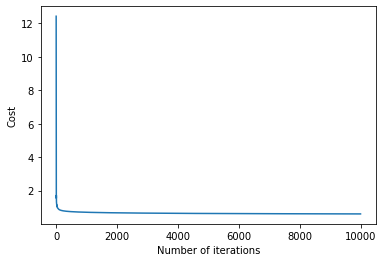

In [30]:
# visualising cost functions after each iteration
plt.plot(cost)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [31]:
#Predicted labels
y_pred = np.empty((y_enc.shape[0], 1))

for q in range(0, y_enc.shape[0]):
    
    for p in range(0, y_enc.shape[1]):
        
        if (output[p,q] == np.max(output[:,q])):
            
            y_pred[q] = p 

In [32]:
y_pred

array([[2.],
       [1.],
       [0.],
       ...,
       [5.],
       [8.],
       [8.]])

In [33]:
#l = np.hstack((y_train, y_pred))
l = np.hstack((y_test, y_pred))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result)

      Actual  Predicted
0        2.0        2.0
1        1.0        1.0
2        0.0        0.0
3        4.0        4.0
4        1.0        1.0
...      ...        ...
1937     4.0        6.0
1938     1.0        1.0
1939     5.0        5.0
1940     7.0        8.0
1941     8.0        8.0

[1942 rows x 2 columns]


In [34]:
from sklearn.metrics import accuracy_score

#print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))
print ("Accuracy of the model is:", accuracy_score(y_pred, y_test)*100, "%")

Accuracy of the model is: 89.28939237899073 %
